# Projeto

 Diretrizes
    
- selecionar um banco de dados do OpenML (https://www.openml.org/)
- o banco de dados de classificação deve ter: > 3 classes, >10 atributos e >1000 instâncias
- cada dupla deve informar qual banco de dados usará com antecedência
- 10-fold cross-validation
- Detalhar versões das bibliotecas utilizadas (adicionado por mim)
- avaliar máquinas de aprendizagem: kNN, DT, MLP, NB, SVM, … 
- métricas (area under the ROC curve, f1-score, accuracy, matriz de confusão média)
- para ajustar os parâmetros das máquinas de aprendizagem usar grid-search ou escolher os parâmetros e justificar
    
    
 O relatório final deve conter pelo menos as seguintes informações:
1. Introdução
2. Algoritmos de Aprendizagem de Máquina
3. Experimentos    
    3.1. Banco de dados
    3.2.Métricas
    3.3. Resultados 
    
4. Conclusões
- Referências

Grupo com no máximo dois integrantes.


- link dataset: https://www.openml.org/search?type=data&sort=runs&status=active&qualities.NumberOfInstances=between_1000_10000&qualities.NumberOfFeatures=between_10_100&qualities.NumberOfClasses=gte_2&id=1501

## Descrição do Dataset

Dataset Description
Semeion Handwritten Digit Data Set, where 1593 handwritten digits from around 80 persons were scanned and documented. The each of the 256 variables V1 - V256 describe one of the pixels and their corresponding values.

Sources
The dataset was created by Tactile Srl, Brescia, Italy (http://www.tattile.it) and donated in 1994 to Semeion Research Center of Sciences of Communication, Rome, Italy (http://www.semeion.it), for machine learning research.

For any questions, e-mail Massimo Buscema (m.buscema '@' semeion.it) or Stefano Terzi (s.terzi '@' semeion.it)

DataSet Information
A total of 1593 handwritten digits from around 80 persons were scanned, stretched in a rectangular box 16x16 in a gray scale of 256 values. Then each pixel of each image was scaled into a boolean (1/0) value using a fixed threshold.

Each person wrote in a paper all the digits from 0 to 9, twice. The commitment was to write the digit the first time in the normal way (trying to write each digit accurately) and the second time in a fast way (with no accuracy).

The best validation protocol for this dataset seems to be a 5x2CV, 50% Tune (Train +Test) and completely blind 50% Validation

Attribute Information
This dataset consists of 1593 records (rows) and 256 attributes (columns). Each record represents a handwritten digit, originally scanned with a resolution of 256 grays scale (28). Each pixel of the each original scanned image was first stretched, and after scaled between 0 and 1 (setting to 0 every pixel whose value was under the value 127 of the grey scale (127 included) and setting to 1 each pixel whose original value in the grey scale was over 127). Finally, each binary image was scaled again into a 16x16 square box (the final 256 binary attributes).

Relevant Papers
M Buscema, MetaNet: The Theory of Independent Judges, in Substance Use & Misuse 33(2)1998, pp 439-461.

# Importar Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import random
import datetime
import os

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import plot_confusion_matrix

sns.set_style("darkgrid")

bold = "\033[1m"
unbold = "\033[0m"

import warnings
warnings.filterwarnings("ignore")

from IPython.core.display import display, HTML, Image
display(HTML("<style>.container { width:93% !important; }</style>"))

root_folder   = r'C:\Users\fhccruz.EMBAD\OneDrive - Embraer\Documents\Treinamento\Embraer\PES - UFPE - Machine Learning\Aulas\Projeto\Dataset/'

## Versão das bibliotecas

In [60]:
! pip list


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Package                            Version
---------------------------------- --------------------
adjustText                         0.7.3
aiohttp                            3.8.3
aiosignal                          1.3.1
alabaster                          0.7.12
alembic                            1.10.4
amadeus                            8.0.0
anaconda-client                    1.9.0
anaconda-navigator                 2.1.1
anaconda-project                   0.10.2
anyio                              3.5.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        21.3.0
argon2-cffi-bindings               21.2.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            5.0.2
asttokens                          2.0.5
async-generator                    1.10
async-timeout                      4.0.2
atomicwrites                      

# Importar Dataset

In [3]:
df_semeion = pd.read_parquet(root_folder + 'semeion_number_dataset.parquet')
df_semeion.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V248,V249,V250,V251,V252,V253,V254,V255,V256,Class
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
3,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'


## Tratamento preliminar dos dados

### Texto Byte para texto String

In [4]:
if type(df_semeion['Class'].iloc[0]) == type(b'byte_string'):
    df_semeion['Class'] = df_semeion['Class'].apply(lambda x: x.decode('utf-8'))

df_semeion.dtypes

V1       float64
V2       float64
V3       float64
V4       float64
V5       float64
          ...   
V253     float64
V254     float64
V255     float64
V256     float64
Class     object
Length: 257, dtype: object

### Mapear classes e números

In [5]:
# Classe/Numero correspondente
dicionario_de_classes_e_numeros = {
    '1' : '0',
    '3' : '1',
    '4' : '2',
    '5' : '3',
    '6' : '4',
    '7' : '5',
    '8' : '6',
    '9' : '7',
    '10': '8',
    '2' : '9'}

if '10' in df_semeion['Class'].unique():
    df_semeion['Class'] = df_semeion['Class'].map(dicionario_de_classes_e_numeros)

# Análise Exploratória

## Distribuição por classes

- Amostra balanceada

In [6]:
df_semeion['Class'].value_counts().rename('contagem das categorias'
                                         ).to_frame().join(
                                                            round(
                                                                df_semeion['Class'].value_counts(normalize=True)*100,3
                                                                 ).rename('porcentagem')
                                                          ).sort_index().style.background_gradient(axis=0, cmap="viridis")

,contagem das categorias,porcentagem
0,161,10.107000
1,162,10.169000
2,159,9.981000
3,159,9.981000
4,161,10.107000
5,159,9.981000
6,161,10.107000
7,158,9.918000
8,155,9.730000
9,158,9.918000


## Similaridade entre categorias

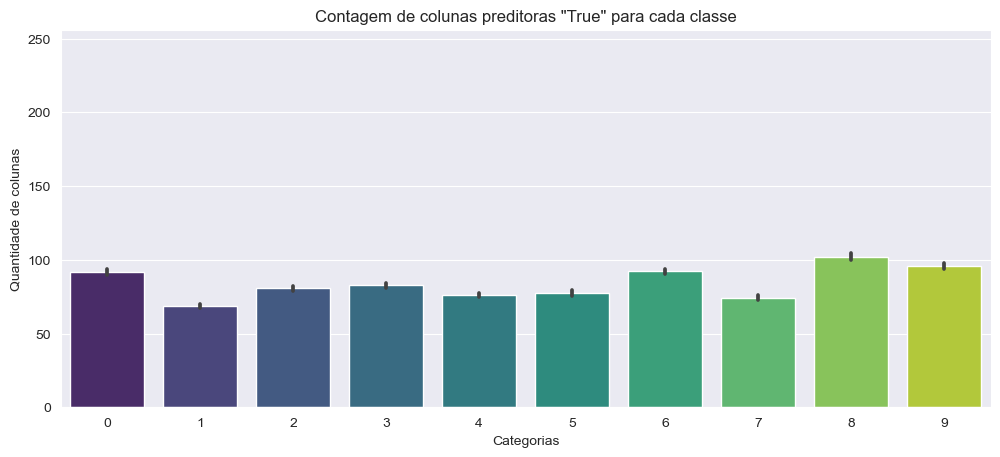

In [7]:
df_semeion_colunasTrue = df_semeion[['Class']].assign(ContagemColunasTrue = df_semeion[df_semeion.columns[:-1]].sum(axis=1))
df_semeion_colunasTrue['Class'] = df_semeion_colunasTrue['Class'].astype('int')

df_semeion_colunasTrue = df_semeion_colunasTrue.sort_values(
    by=['Class','ContagemColunasTrue'],
    ascending=[True,False]).reset_index(drop=True)

plt.figure(figsize=(12,5),dpi=100)
sns.barplot(data = df_semeion_colunasTrue,x='Class',y='ContagemColunasTrue',palette='viridis')
plt.ylabel('Quantidade de colunas')
plt.xlabel('Categorias')
plt.ylim(0,256)
plt.title('Contagem de colunas preditoras "True" para cada classe');

## Mapa de calor da média dos atributos para cada categoria

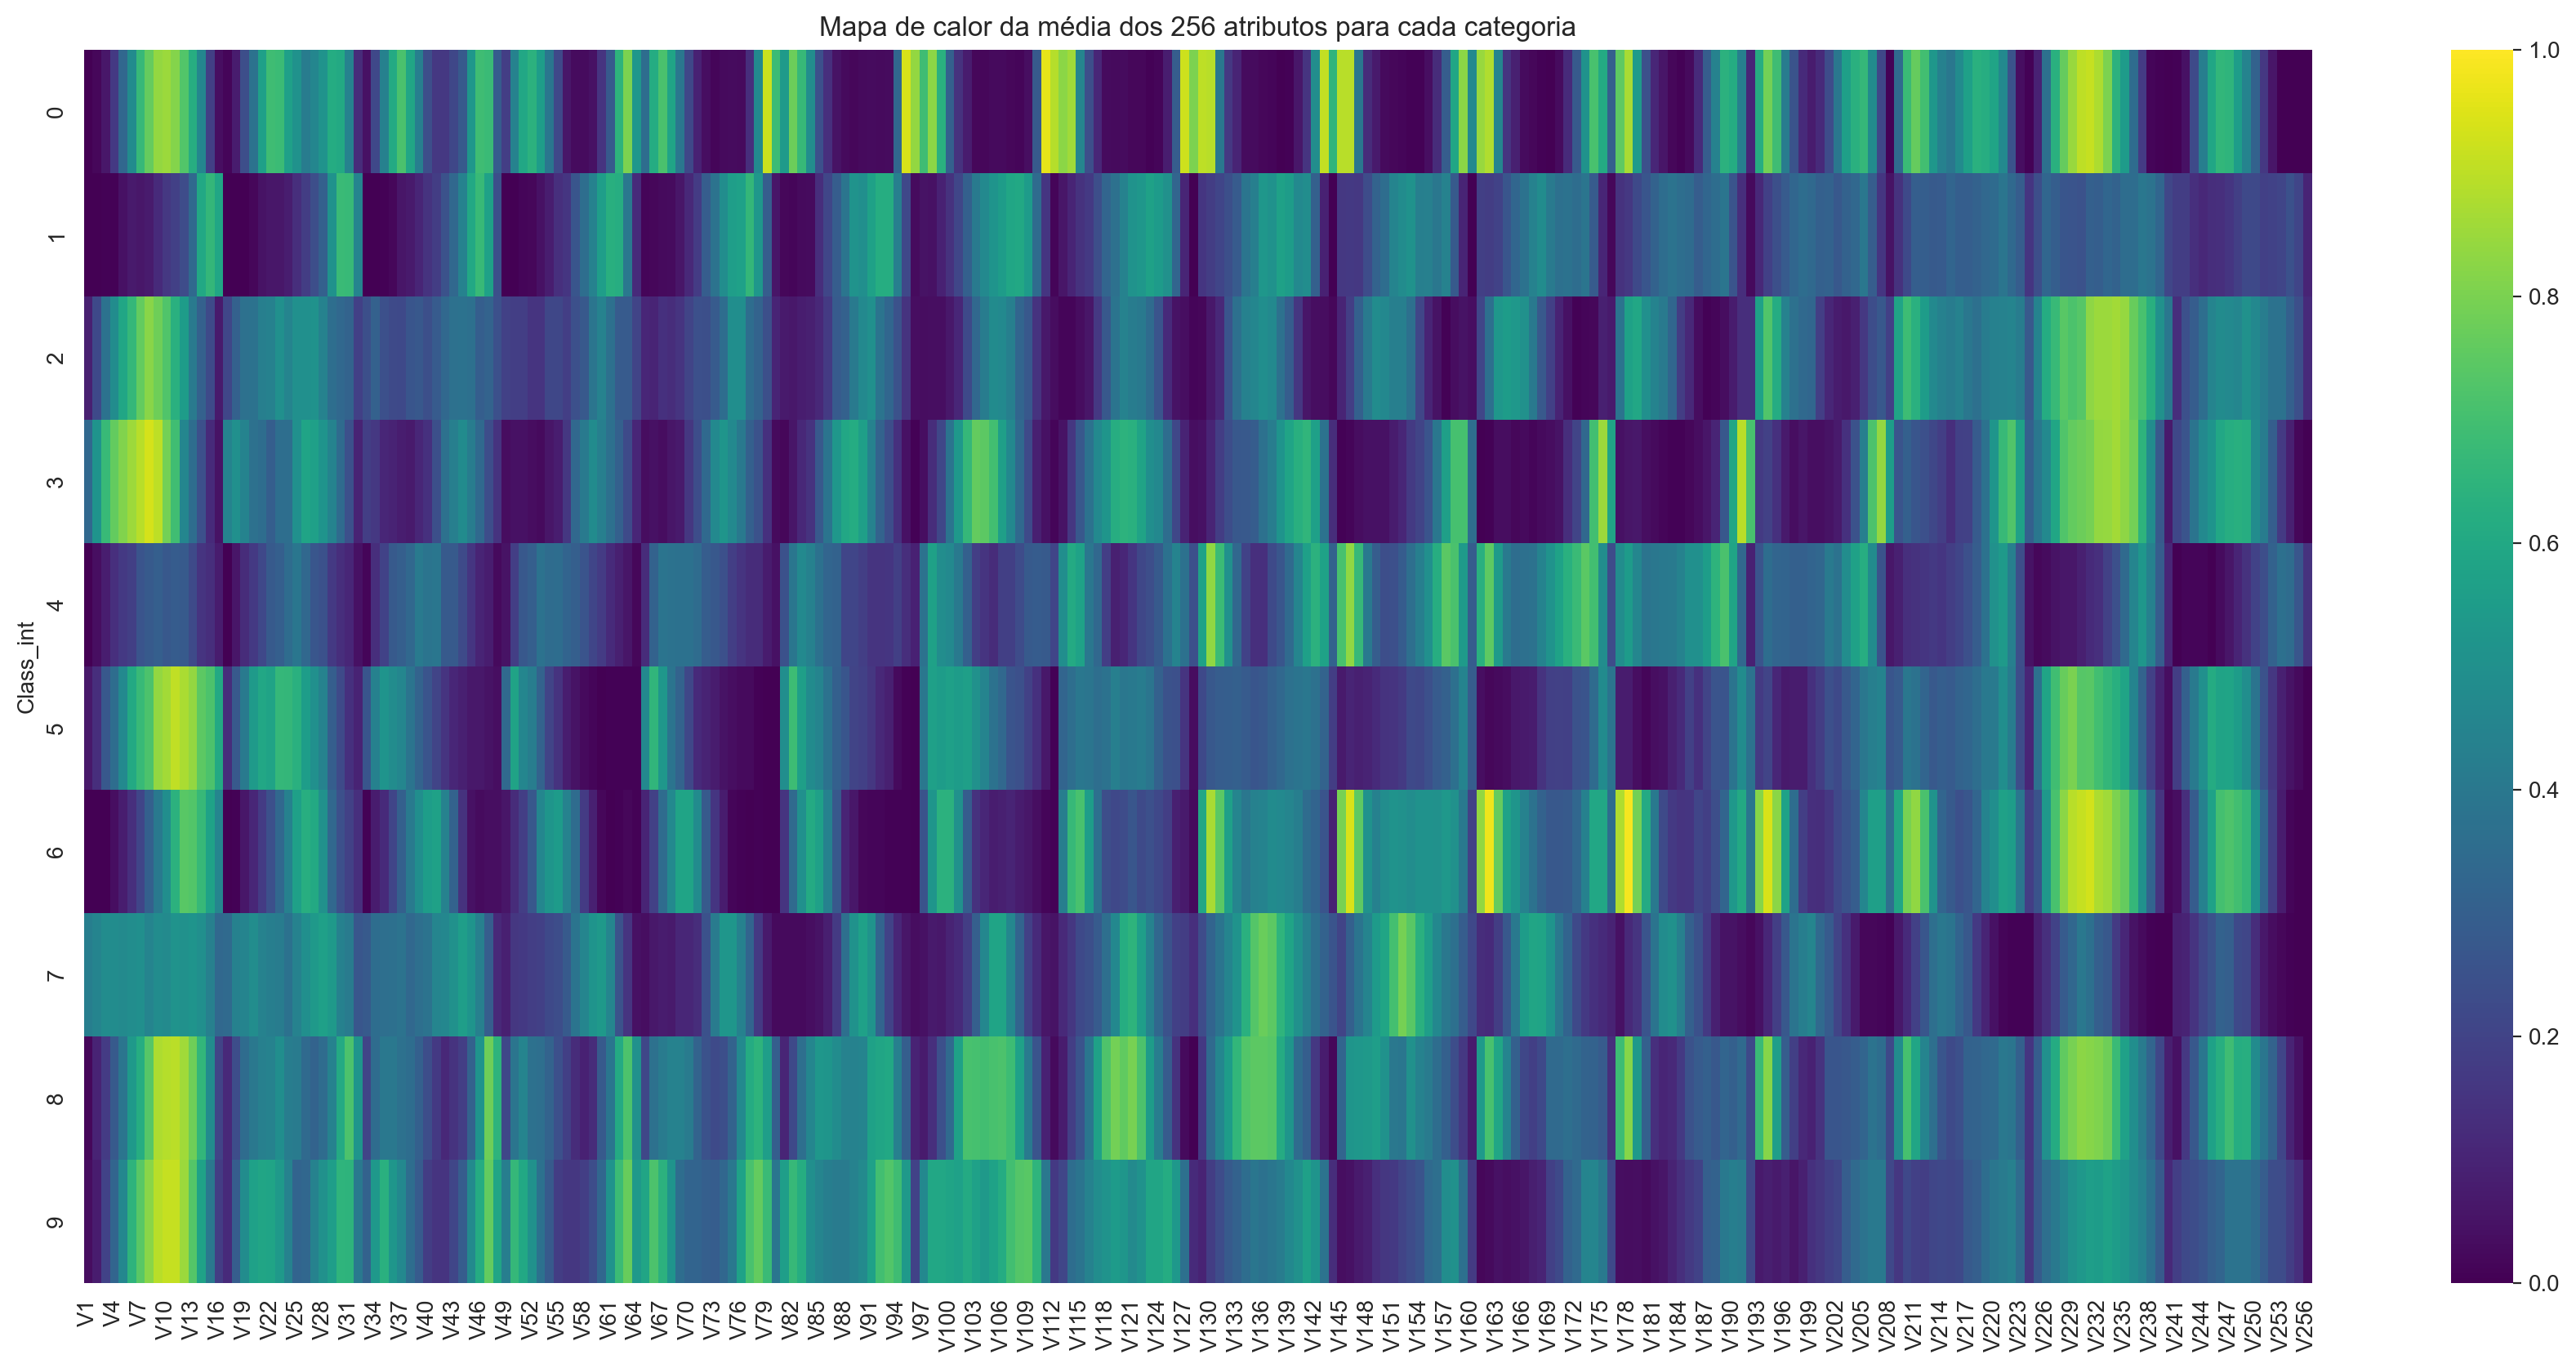

In [8]:
plt.figure(figsize=(22,10),dpi=200)
sns.heatmap(df_semeion.assign(Class_int = df_semeion['Class'].astype('int')).groupby('Class_int').mean(),vmin=0,vmax=1,cmap='viridis')
plt.title('Mapa de calor da média dos 256 atributos para cada categoria');

### Mapa de calor com a variância

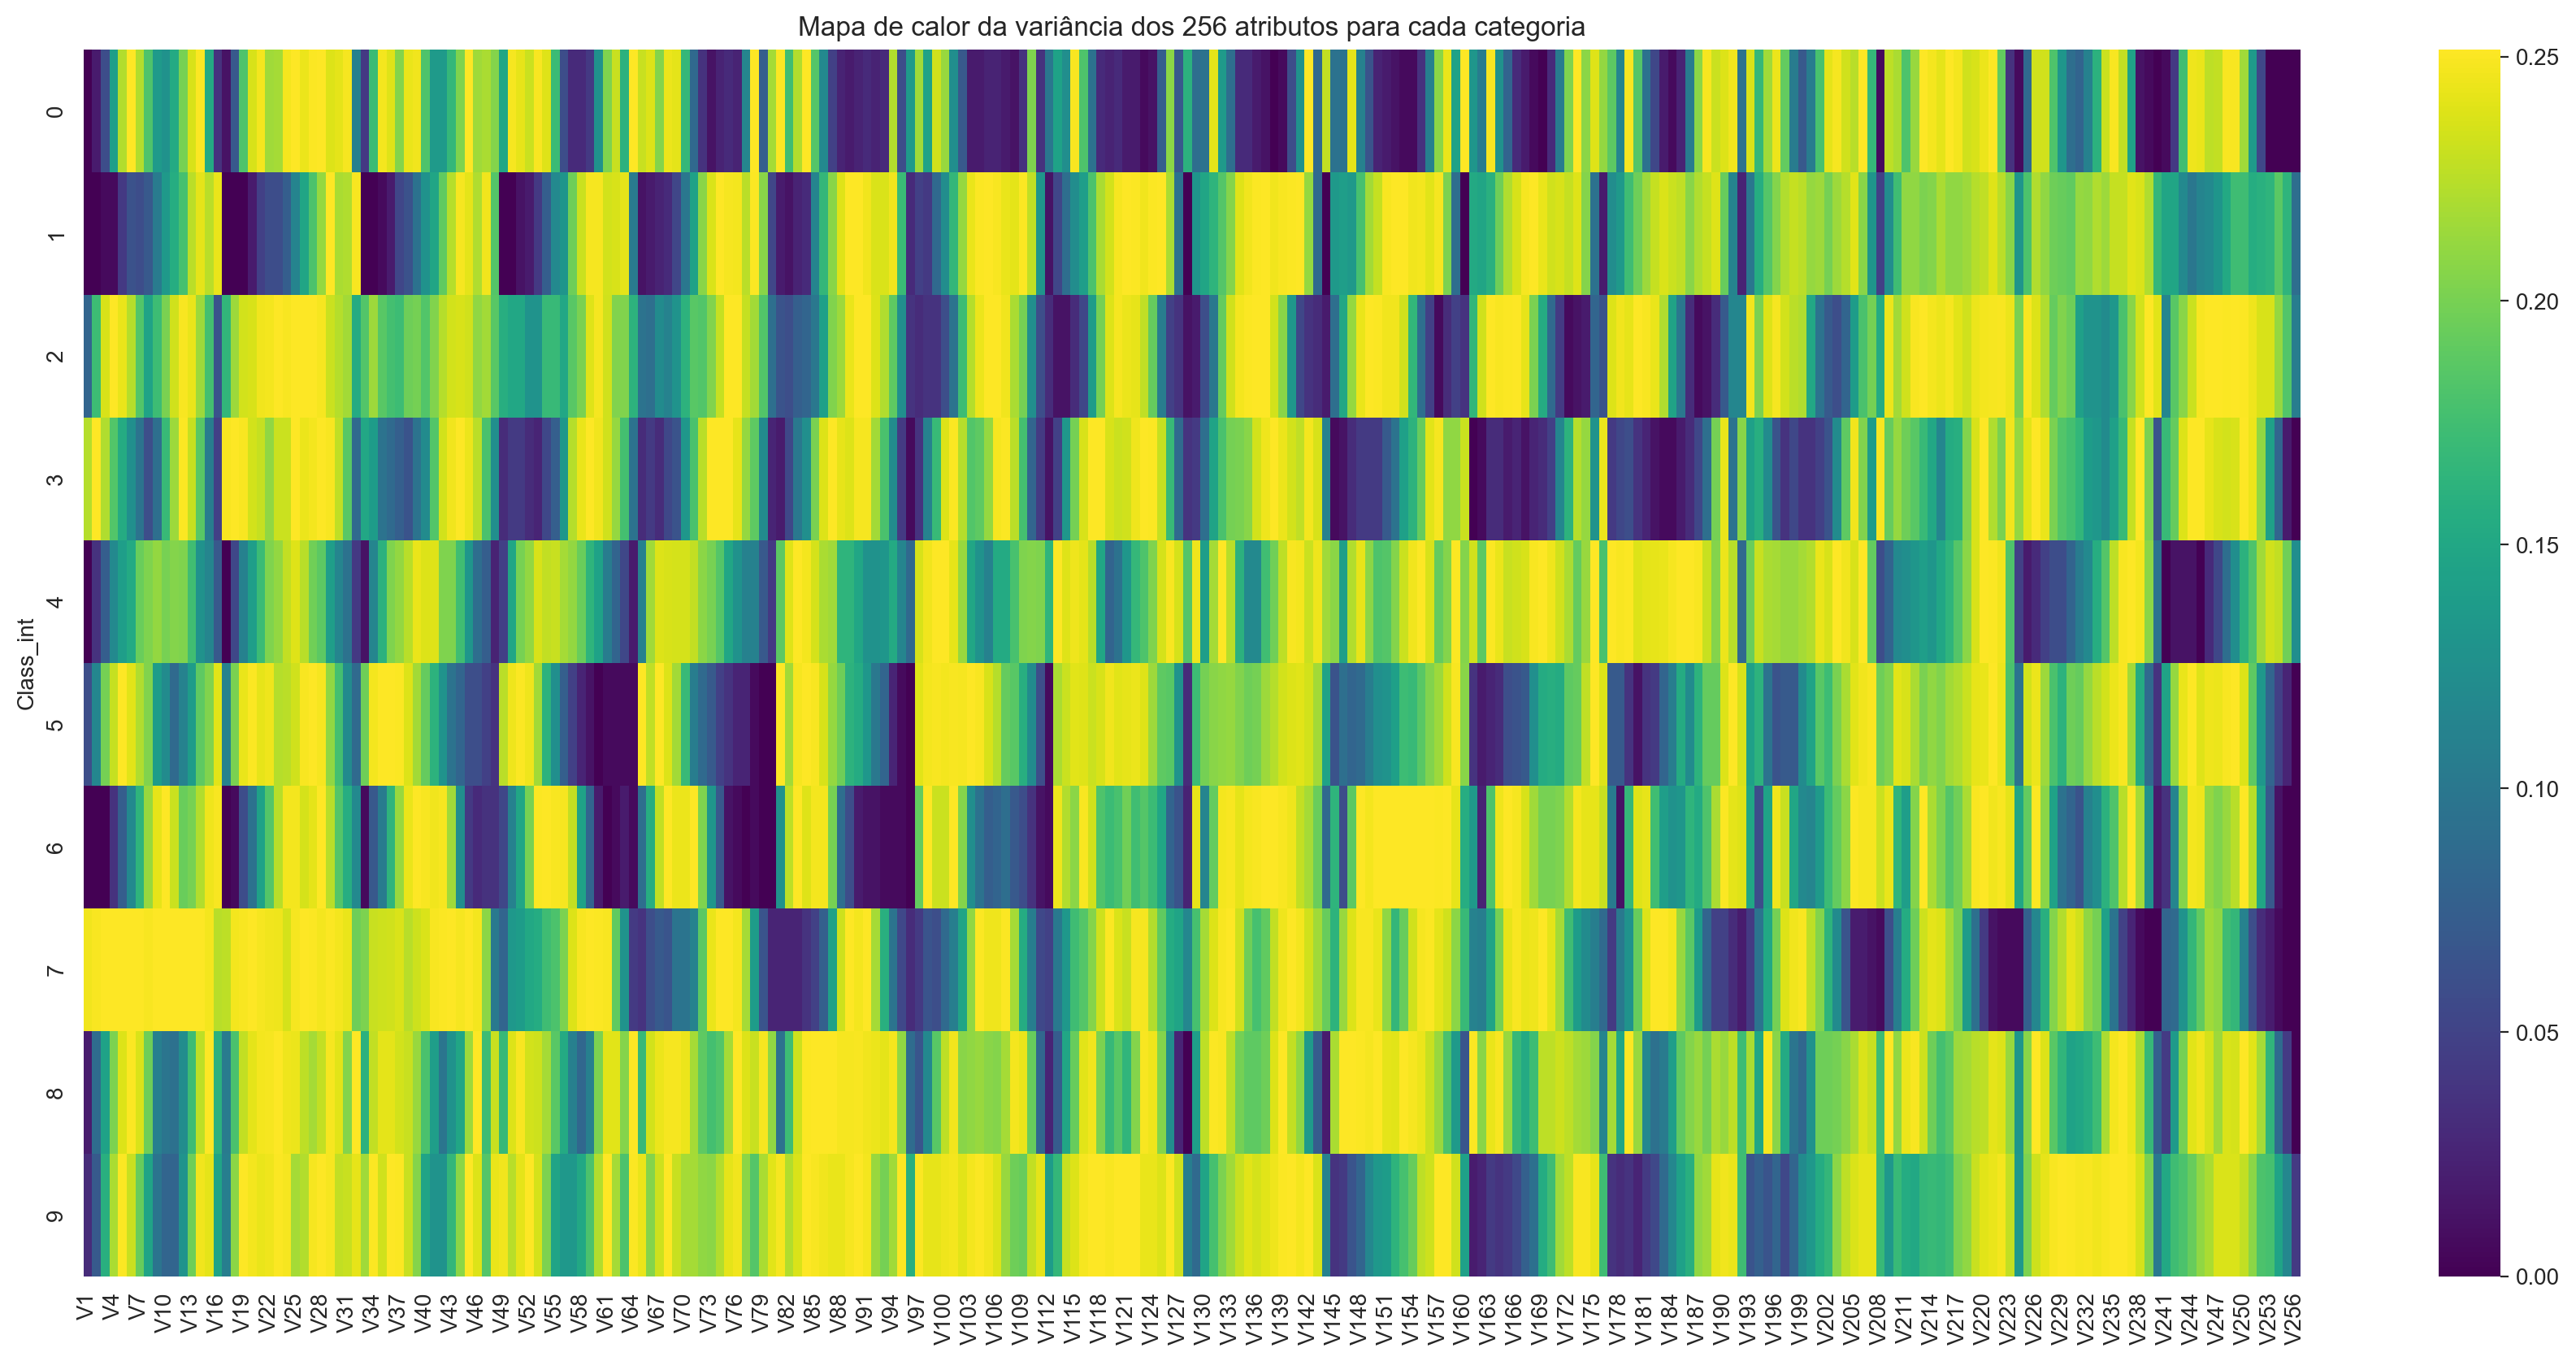

In [9]:
plt.figure(figsize=(22,10),dpi=200)
sns.heatmap(df_semeion.assign(Class_int = df_semeion['Class'].astype('int')).groupby('Class_int').std()**2,cmap='viridis')
plt.title('Mapa de calor da variância dos 256 atributos para cada categoria');

## Decodificar Bits para Imagem

361


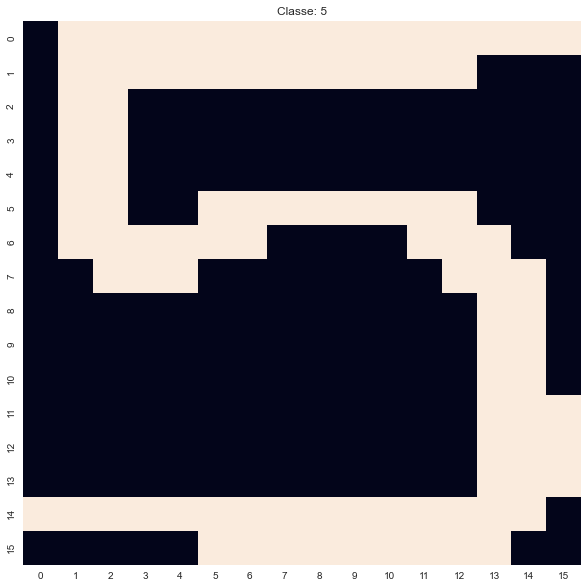

In [10]:
def decode_bits_to_image(line):
    '''
        Esta função traduz os bits do dataframe com 256 colunas binárias para uma imagem 16x16 bits
        <args>:
            line: uma linha do dataframe contendo todas as colunas
        <returns>:
            None, se a variável de entrada não cumprir os requisitos
        <prints>:
            plota o gráfico (imagem) do número da forma como foi escrito 
    '''
    if len(line.columns)<256 or len(line)>1:
        print(bold,'>>> Erro. Favor inserir apenas uma linha com todas as colunas...',unbold)
        return None
    
    start= 0
    end  = 16
    
    decode_number_list = []
    
    for intervals in range(16):
        df_aux = line.iloc[:1][line.columns[start:end]]
        df_aux.columns = [i for i in range(0,16)]
        decode_number_list.append(df_aux)
        start+=16
        end+=16
    
    plt.figure(figsize=(10,10))
    sns.heatmap(pd.concat(decode_number_list,ignore_index=True),cbar=False)
    plt.title('Classe: ' + str(line['Class'].values[0]))
    plt.show()

random_index = np.random.choice(df_semeion.index)
print(random_index)

decode_bits_to_image(df_semeion.loc[random_index:random_index])

# Modelos

In [11]:
models_list = []
RANDOM_STATE = 123

## Divisão Treino/Teste

- Utiliza-se a variável alvo no parâmetro "stratify" para forçar que a proporção original se mantenha nas novas variáveis

In [12]:
X = df_semeion[df_semeion.columns[:-1]].copy()
y = df_semeion[df_semeion.columns[-1:]].copy()

x_train, x_test, y_train, y_test = train_test_split(X,y,stratify=df_semeion['Class'],random_state=321)

df_compare_models = y_test.copy()

## Arvore de Decisão (DTC)

In [13]:
dtc_model = DecisionTreeClassifier(random_state=RANDOM_STATE)
dtc_model.fit(x_train,y_train)
print(metrics.classification_report(y_true=y_test,y_pred=dtc_model.predict(x_test)))

df_compare_models['DTC'] = dtc_model.predict(x_test)

models_list.append(dtc_model)

print("Profundidade da árvore: ",dtc_model.tree_.max_depth)

              precision    recall  f1-score   support

           0       0.87      0.82      0.85        40
           1       0.81      0.73      0.77        41
           2       0.69      0.50      0.58        40
           3       0.92      0.88      0.90        40
           4       0.78      0.70      0.74        40
           5       0.80      0.82      0.81        40
           6       0.84      0.95      0.89        40
           7       0.61      0.70      0.65        40
           8       0.57      0.62      0.59        39
           9       0.62      0.74      0.67        39

    accuracy                           0.75       399
   macro avg       0.75      0.75      0.75       399
weighted avg       0.75      0.75      0.75       399

Profundidade da árvore:  16


### Árvore com GridSearchCV

In [14]:
# parameter_space = {
    # 'criterion': ['gini','entropy'],
    # 'splitter': ['best', 'random'],
    # 'max_depth': [5,10,50,100],
    # 'min_samples_split': [1,5,10],
    # 'min_samples_leaf': [1,8,12],
# }
# 
# dtc_test = DecisionTreeClassifier()
# 
# gscv_dtc = GridSearchCV(dtc_test,parameter_space,n_jobs=-1, cv=10,verbose =2)
# gscv_dtc.fit(x_train,y_train)
# 
# # models_list.append(gscv_dtc)
# 
# print(metrics.classification_report(y_true=y_test,y_pred=gscv_dtc.predict(x_test)))

In [15]:
# best_model_location = gscv_dtc.cv_results_['rank_test_score'].argmin()
# means = gscv_dtc.cv_results_['mean_test_score']
# stds = gscv_dtc.cv_results_['std_test_score']
# 
# print(bold,'Best Model:',unbold)
# print('\t\tMean test score: ',round(means[best_model_location],3),'+/-',round(stds[best_model_location],3))
# 
# for mean, std, params in zip(means, stds, gscv_dtc.cv_results_['params']):
    # print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

## Random Forest (RFC)

In [16]:
rfc_model = RandomForestClassifier(random_state=RANDOM_STATE)
rfc_model.fit(x_train,y_train)
print(metrics.classification_report(y_true=y_test,y_pred=rfc_model.predict(x_test)))

models_list.append(rfc_model)

df_compare_models['RFC'] = rfc_model.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        40
           1       0.97      0.90      0.94        41
           2       0.92      0.88      0.90        40
           3       0.98      1.00      0.99        40
           4       0.90      0.93      0.91        40
           5       1.00      1.00      1.00        40
           6       0.91      1.00      0.95        40
           7       0.97      0.97      0.97        40
           8       0.88      0.95      0.91        39
           9       1.00      0.97      0.99        39

    accuracy                           0.95       399
   macro avg       0.95      0.95      0.95       399
weighted avg       0.95      0.95      0.95       399



### Random Forest com GridSearchCV

In [17]:
# parameter_space = {
    # 'n_estimators':[100,300],
    # 'criterion': ['gini','entropy'],
    # 'splitter': ['best', 'random'],
    # 'max_depth': [20,50],
    # 'min_samples_split': [1,5],
    # 'min_samples_leaf': [1,8],
# }
# 
# rfc_test = RandomForestClassifier()
# 
# gscv_rfc = GridSearchCV(rfc_test,parameter_space,n_jobs=-1, cv=10,verbose =2)
# gscv_rfc.fit(x_train,y_train)
# 
# print(metrics.classification_report(y_true=y_test,y_pred=gscv_rfc.predict(x_test)))

In [18]:
# best_model_location = gscv_rfc.cv_results_['rank_test_score'].argmin()
# means = gscv_rfc.cv_results_['mean_test_score']
# stds = gscv_rfc.cv_results_['std_test_score']
# 
# print(bold,'Best Model:',unbold)
# print('\t\tMean test score: ',round(means[best_model_location],3),'+/-',round(stds[best_model_location],3))
# 
# for mean, std, params in zip(means, stds, gscv_rfc.cv_results_['params']):
    # print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

## Gradient Boosting Classifier (GBC)

In [19]:
gbc_model = GradientBoostingClassifier(random_state=RANDOM_STATE)
gbc_model.fit(x_train,y_train)
print(metrics.classification_report(y_true=y_test,y_pred=gbc_model.predict(x_test)))

models_list.append(gbc_model)

df_compare_models['GBC'] = gbc_model.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        40
           1       0.97      0.93      0.95        41
           2       0.97      0.93      0.95        40
           3       0.98      1.00      0.99        40
           4       0.93      0.93      0.93        40
           5       0.97      0.93      0.95        40
           6       0.98      1.00      0.99        40
           7       0.87      0.97      0.92        40
           8       0.90      0.95      0.92        39
           9       0.93      0.95      0.94        39

    accuracy                           0.95       399
   macro avg       0.95      0.95      0.95       399
weighted avg       0.95      0.95      0.95       399



## KNN

In [20]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)
print(metrics.classification_report(y_true=y_test,y_pred=knn_model.predict(x_test)))

models_list.append(knn_model)

df_compare_models['KNN'] = knn_model.predict(x_test)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        40
           1       0.87      1.00      0.93        41
           2       0.97      0.97      0.97        40
           3       0.83      1.00      0.91        40
           4       0.97      0.93      0.95        40
           5       0.88      0.95      0.92        40
           6       1.00      0.95      0.97        40
           7       0.97      0.90      0.94        40
           8       0.85      0.85      0.85        39
           9       0.97      0.74      0.84        39

    accuracy                           0.92       399
   macro avg       0.93      0.92      0.92       399
weighted avg       0.93      0.92      0.92       399



## Naive Bayes

In [21]:
gnb_model = GaussianNB()
gnb_model.fit(x_train,y_train)
print(bold,'\t\t\t Gaussian',unbold)
print(metrics.classification_report(y_true=y_test,y_pred=gnb_model.predict(x_test)))

bnb_model = BernoulliNB()
bnb_model.fit(x_train,y_train)
print(bold,'\t\t\t Bernoulli',unbold)
print(metrics.classification_report(y_true=y_test,y_pred=bnb_model.predict(x_test)))

mnb_model = MultinomialNB()
mnb_model.fit(x_train,y_train)
print(bold,'\t\t\t Multinomial',unbold)
print(metrics.classification_report(y_true=y_test,y_pred=mnb_model.predict(x_test)))

models_list.append(mnb_model)

df_compare_models['Multinom_NB'] = mnb_model.predict(x_test)

 			 Gaussian 
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        40
           1       0.56      0.85      0.67        41
           2       1.00      0.62      0.77        40
           3       1.00      0.75      0.86        40
           4       0.92      0.60      0.73        40
           5       0.78      0.90      0.84        40
           6       0.90      0.95      0.93        40
           7       0.75      0.95      0.84        40
           8       0.68      0.82      0.74        39
           9       0.94      0.79      0.86        39

    accuracy                           0.81       399
   macro avg       0.85      0.81      0.81       399
weighted avg       0.85      0.81      0.81       399

 			 Bernoulli 
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        40
           1       0.81      0.71      0.75        41
           2       0.97      0.82      0.89    

## Regressão Logística

In [22]:
lr_model = LogisticRegression(random_state=RANDOM_STATE)
lr_model.fit(x_train,y_train)
print(metrics.classification_report(y_true=y_test,y_pred=lr_model.predict(x_test)))

models_list.append(lr_model)

df_compare_models['LR'] = lr_model.predict(x_test)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        40
           1       0.86      0.90      0.88        41
           2       0.95      0.90      0.92        40
           3       0.97      0.90      0.94        40
           4       0.92      0.90      0.91        40
           5       0.95      0.95      0.95        40
           6       1.00      0.97      0.99        40
           7       0.91      0.97      0.94        40
           8       0.86      0.95      0.90        39
           9       0.89      0.87      0.88        39

    accuracy                           0.93       399
   macro avg       0.93      0.93      0.93       399
weighted avg       0.93      0.93      0.93       399



## Perceptron

In [23]:
pcptn_model = Perceptron(random_state=RANDOM_STATE)
pcptn_model.fit(x_train,y_train)
print(metrics.classification_report(y_true=y_test,y_pred=pcptn_model.predict(x_test)))

models_list.append(pcptn_model)

df_compare_models['Perceptron'] = pcptn_model.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.89      0.95      0.92        41
           2       0.92      0.88      0.90        40
           3       0.90      0.93      0.91        40
           4       0.97      0.88      0.92        40
           5       0.89      0.97      0.93        40
           6       0.97      0.97      0.97        40
           7       0.95      0.97      0.96        40
           8       0.78      0.79      0.78        39
           9       0.84      0.79      0.82        39

    accuracy                           0.91       399
   macro avg       0.91      0.91      0.91       399
weighted avg       0.91      0.91      0.91       399



## Support Vector Machines (SVM)

In [24]:
svm_model = SVC(random_state=RANDOM_STATE, probability =True)
svm_model.fit(x_train,y_train)
print(metrics.classification_report(y_true=y_test,y_pred=svm_model.predict(x_test)))

models_list.append(svm_model)

df_compare_models['SVM'] = svm_model.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.93      0.93      0.93        41
           2       0.97      0.93      0.95        40
           3       1.00      0.97      0.99        40
           4       0.95      0.95      0.95        40
           5       0.97      0.97      0.97        40
           6       1.00      1.00      1.00        40
           7       0.97      0.97      0.97        40
           8       0.85      1.00      0.92        39
           9       0.97      0.92      0.95        39

    accuracy                           0.96       399
   macro avg       0.96      0.96      0.96       399
weighted avg       0.96      0.96      0.96       399



## Multi-Layer Perceptron (MLP)

In [25]:
mlp_model = MLPClassifier(verbose=False, random_state=RANDOM_STATE)
mlp_model.fit(x_train,y_train)
print(metrics.classification_report(y_true=y_test,y_pred=mlp_model.predict(x_test)))

models_list.append(mlp_model)

df_compare_models['MLP'] = mlp_model.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.93      0.90      0.91        41
           2       0.97      0.88      0.92        40
           3       1.00      0.93      0.96        40
           4       0.93      0.93      0.93        40
           5       0.95      0.97      0.96        40
           6       0.95      0.97      0.96        40
           7       0.93      0.97      0.95        40
           8       0.87      1.00      0.93        39
           9       0.92      0.92      0.92        39

    accuracy                           0.94       399
   macro avg       0.94      0.94      0.94       399
weighted avg       0.94      0.94      0.94       399



### MLP com Grid Search Cross Validation (GridSearchCV)

https://datascience.stackexchange.com/questions/36049/how-to-adjust-the-hyperparameters-of-mlp-classifier-to-get-more-perfect-performa

In [26]:
# parameter_space = {
    # 'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    # 'activation': ['tanh', 'relu','identity', 'logistic'],
    # 'solver': ['sgd', 'adam','lbfgs'],
    # 'alpha': [0.0001, 0.05],
    # 'learning_rate': ['constant','adaptive','invscaling'],
# }
# 
# mlp_test = MLPClassifier()
# 
# gscv_mlp = GridSearchCV(mlp_test,parameter_space,n_jobs=-1, cv=10)
# gscv_mlp.fit(x_train,y_train)
# 
# print(metrics.classification_report(y_true=y_test,y_pred=gscv_mlp.predict(x_test)))

In [27]:
# best_model_location = gscv_mlp.cv_results_['rank_test_score'].argmin()
# means = gscv_mlp.cv_results_['mean_test_score']
# stds = gscv_mlp.cv_results_['std_test_score']
# 
# print(bold,'Best Model:',unbold)
# print('\t\tMean test score: ',round(means[best_model_location],3),'+/-',round(stds[best_model_location],3))
# 
# for mean, std, params in zip(means, stds, gscv_mlp.cv_results_['params']):
    # print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

# Validação de Modelos

## Dataframe de comparação de modelos

In [28]:
df_compare_models.head(10).apply(lambda row: row.astype('int'),axis=0).style.background_gradient(axis=1, cmap="viridis")

,Class,DTC,RFC,GBC,KNN,Multinom_NB,LR,Perceptron,SVM,MLP
530,8,8,8,8,8,8,8,8,8,8
1363,0,4,0,0,0,0,0,0,0,0
1100,9,9,9,9,9,9,9,9,9,9
1353,8,8,8,8,3,3,3,3,8,8
1084,8,8,8,8,3,3,8,8,8,8
826,9,9,9,9,9,9,9,9,9,9
366,6,6,6,6,6,0,6,2,6,6
226,6,6,6,6,6,6,6,6,6,6
181,2,7,2,2,2,2,2,2,2,2
215,5,5,5,5,5,5,5,5,5,5


## CrossTab dos modelos

In [29]:
cross_tab_list = []

for col in df_compare_models.columns[1:]:
    print(col)
    df_aux = pd.crosstab(df_compare_models['Class'],df_compare_models[col])    
    df_aux.index = pd.MultiIndex.from_arrays([[col]*len(df_aux),df_aux.index],names=('model','true_class'))
    df_aux.columns = pd.MultiIndex.from_arrays([['Predicted']*len(df_aux),df_aux.columns],names=('Predictions','digits'))
    cross_tab_list.append(df_aux)

pd.concat(cross_tab_list,axis=0)

# 2.3. Regressão Logística
# 2.4. Árvore de Decisão
# 2.5. K-Nearest Neighbors
# 2.6. Multi-Layer Perceptron (MLP)
# 2.7. Support Vector Machines (SVM)
# 2.8. Gradient Boosting (GBC) e Random Forest (RFC) Classifiers
# 2.9. Classificador Naive Bayes

DTC
RFC
GBC
KNN
Multinom_NB
LR
Perceptron
SVM
MLP


Predictions      Predicted                                    
digits                   0   1   2   3   4   5   6   7   8   9
model true_class                                              
DTC   0                 33   1   0   0   2   0   0   1   2   1
      1                  0  30   1   0   2   0   0   5   2   1
      2                  2   1  20   1   1   1   3   4   6   1
      3                  0   0   0  35   0   1   0   2   0   2
      4                  2   1   1   0  28   2   0   3   0   3
...                    ...  ..  ..  ..  ..  ..  ..  ..  ..  ..
MLP   5                  0   0   0   0   0  39   0   0   0   1
      6                  0   0   0   0   1   0  39   0   0   0
      7                  0   0   0   0   0   0   0  39   0   1
      8                  0   0   0   0   0   0   0   0  39   0
      9                  0   0   0   0   0   1   0   0   2  36

[90 rows x 10 columns]

## Verificar erros de modelos específicos

,Class,DTC,RFC,GBC,KNN,Multinom_NB,LR,Perceptron,SVM,MLP
1363,0,4,0,0,0,0,0,0,0,0
181,2,7,2,2,2,2,2,2,2,2
145,0,4,0,0,0,0,0,0,0,0
919,2,7,2,2,2,2,2,2,2,2
1282,8,6,8,8,3,8,8,3,8,8
...,...,...,...,...,...,...,...,...,...,...
665,3,9,3,3,3,9,1,9,1,1
1222,8,2,8,8,8,8,8,8,8,8
954,4,7,1,1,1,1,1,1,1,1
977,4,0,4,4,4,0,4,4,4,4


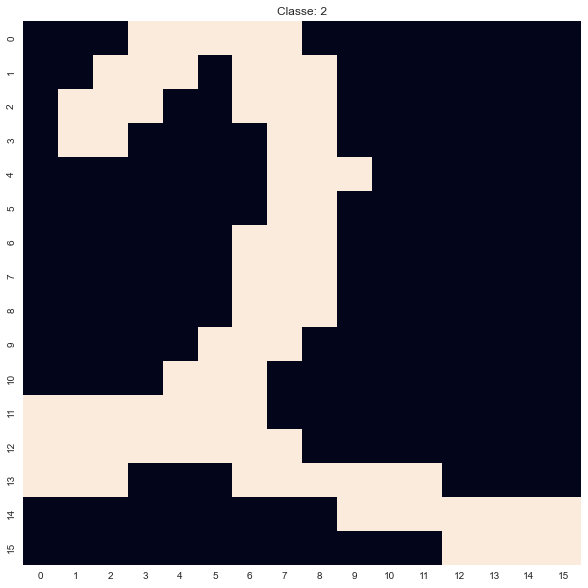

In [30]:
display(df_compare_models[df_compare_models['Class']!=df_compare_models['DTC']])

decode_bits_to_image(df_semeion.loc[181:181])

## Acurácia dos modelos

In [31]:
print("Acurácia")
for model in models_list:
    print()
    print(str(model).split('(')[0])
    print(metrics.accuracy_score(y_true=y_test,y_pred=model.predict(x_test)))

Acurácia

DecisionTreeClassifier
0.7468671679197995

RandomForestClassifier
0.9523809523809523

GradientBoostingClassifier
0.9473684210526315

KNeighborsClassifier
0.924812030075188

MultinomialNB
0.8696741854636592

LogisticRegression
0.9273182957393483

Perceptron
0.9097744360902256

SVC
0.9598997493734336

MLPClassifier
0.9423558897243107


## Curva ROC

- [Curva ROC MultiClasse](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html 'Scikit Learn Website')

Perceptron 9

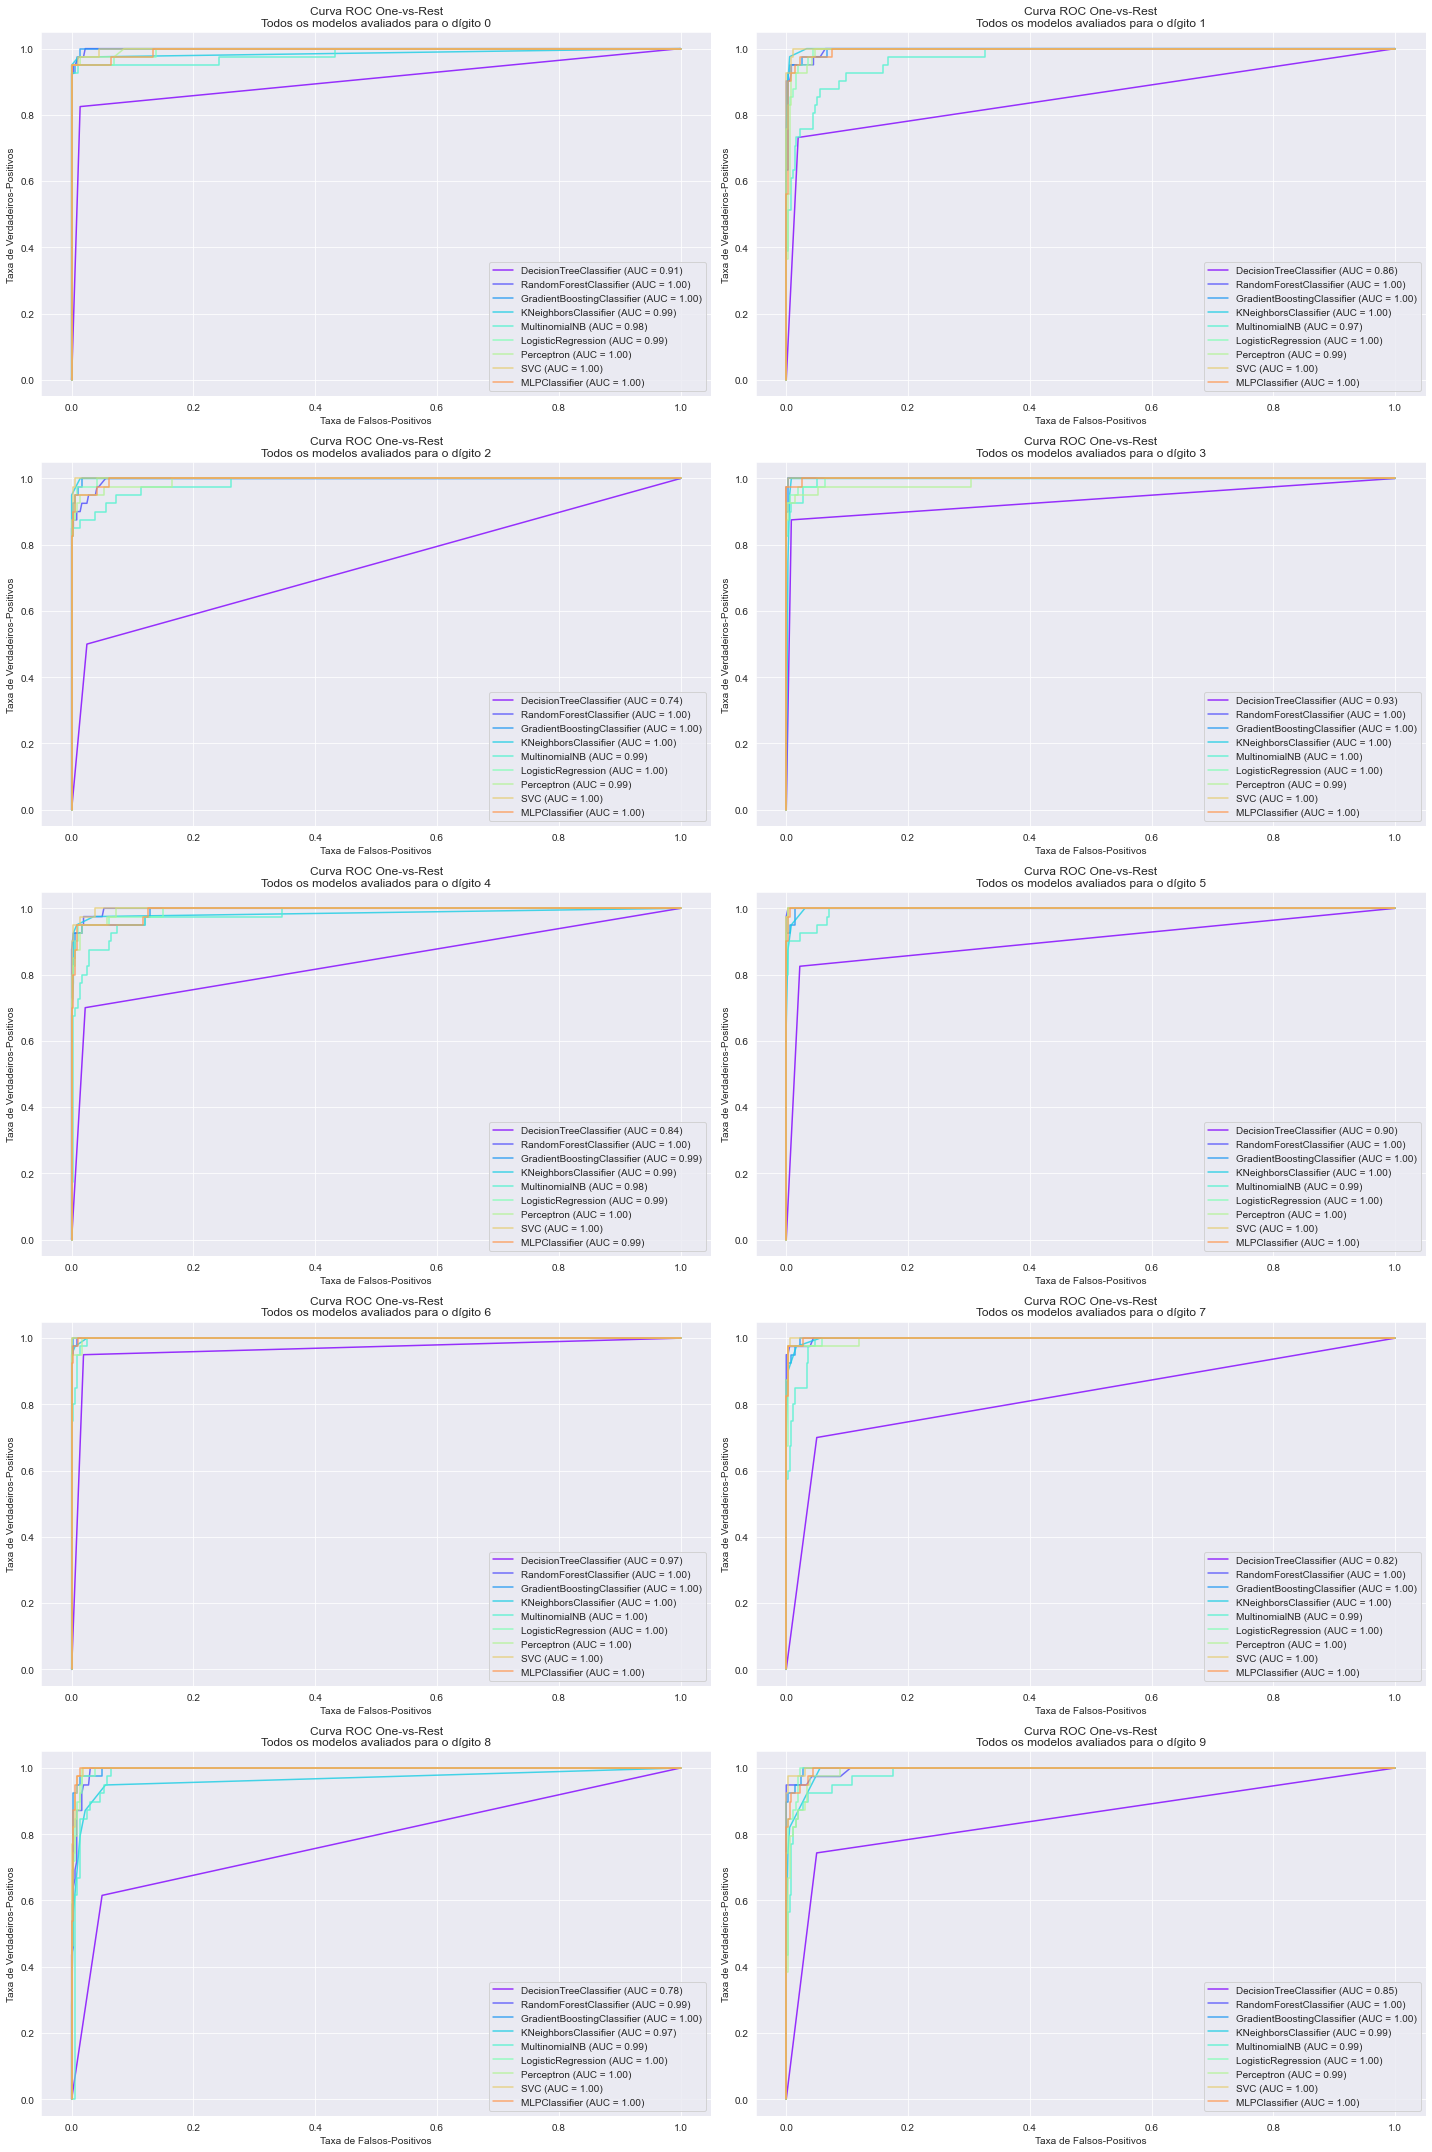

In [45]:
fig, axes = plt.subplots(nrows=5,ncols=2,figsize=(20,30))
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
# y_onehot_test.shape              # (n_samples, n_classes)
# label_binarizer.transform(["8"]) # observar funcionamento do label_binarizer
    
for ax , class_of_interest in zip(axes.reshape(-1),'0,1,2,3,4,5,6,7,8,9'.split(',')):
    
    color = iter(cm.rainbow(np.linspace(0, 1, 11)))
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

    for model in models_list:
        
        c = next(color)
        
        try:    # todos os modelos, exceto perceptron
            
            y_score = model.predict_proba(x_test)
        
        except: # alteração para obter probabilidades do modelo do perceptron
            
            print(f'\r{str(model).split("(")[0]}',end=' ' + class_of_interest)
            
            clf_isotonic = CalibratedClassifierCV(model, cv=10, method='isotonic')

            clf_isotonic.fit(x_train, y_train)
            
            y_score = clf_isotonic.predict_proba(x_test)
            
            
        metrics.RocCurveDisplay.from_predictions(
            y_onehot_test[:, class_id],
            y_score[:, class_id],
            name=str(model).split('(')[0],
            color=c,
            ax=ax,
            alpha=0.8
        )
    
    ax.set_xlabel("Taxa de Falsos-Positivos")
    ax.set_ylabel("Taxa de Verdadeiros-Positivos")
    ax.set_title("Curva ROC One-vs-Rest\nTodos os modelos avaliados para o dígito "+ class_of_interest)
    ax.legend()

plt.tight_layout()
plt.show()

# GridSearch para modelos selecionados

## MLP GridSearch

In [73]:
print(datetime.datetime.now())
parameter_space = {
    'hidden_layer_sizes': [(100,), (100,100,100,100,),(50,50,50,50,50,),(250,250,250,)],
    'activation'        : ['tanh', 'relu'],
    'solver'            : ['adam','lbfgs'],
    'learning_rate'     : ['constant','adaptive'],
}

mlp_test = MLPClassifier(random_state=123)

gscv_mlp = GridSearchCV(mlp_test,parameter_space,n_jobs=-1, cv=10)
gscv_mlp.fit(x_train,y_train)

print(metrics.classification_report(y_true=y_test,y_pred=gscv_mlp.predict(x_test)))

print(datetime.datetime.now())

# 32 modelos

2023-07-31 16:52:53.544857
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        40
           1       0.93      0.95      0.94        41
           2       0.95      0.93      0.94        40
           3       1.00      0.95      0.97        40
           4       0.93      0.95      0.94        40
           5       0.97      0.97      0.97        40
           6       1.00      0.95      0.97        40
           7       0.95      0.95      0.95        40
           8       0.87      1.00      0.93        39
           9       0.92      0.92      0.92        39

    accuracy                           0.95       399
   macro avg       0.95      0.95      0.95       399
weighted avg       0.95      0.95      0.95       399

2023-07-31 16:57:48.309037


### Melhor Configuração para o modelo MLP - GridSearch

In [71]:
best_model_location = gscv_mlp.cv_results_['rank_test_score'].argmin()
means = gscv_mlp.cv_results_['mean_test_score']
stds = gscv_mlp.cv_results_['std_test_score']

print(bold,'Best Model:',unbold)
print('\t\tMean test score: ',round(means[best_model_location],3),'+/-',round(stds[best_model_location],3))

for mean, std, params in zip(means, stds, gscv_mlp.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

 Best Model: 
		Mean test score:  0.921 +/- 0.023
0.905 (+/-0.027) for {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
0.909 (+/-0.028) for {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'lbfgs'}
0.905 (+/-0.027) for {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.909 (+/-0.028) for {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
0.910 (+/-0.019) for {'activation': 'tanh', 'hidden_layer_sizes': (100, 150, 100, 100), 'learning_rate': 'constant', 'solver': 'adam'}
0.893 (+/-0.034) for {'activation': 'tanh', 'hidden_layer_sizes': (100, 150, 100, 100), 'learning_rate': 'constant', 'solver': 'lbfgs'}
0.910 (+/-0.019) for {'activation': 'tanh', 'hidden_layer_sizes': (100, 150, 100, 100), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.893 (+/-0.034) for {'activation': 'tanh', 'hidden_layer_

## SVM GridSearch

- Rodar toda a configuração de uma só vez pode demorar muito tempo (ou causar abort da CPU -> kill process - Observável pelo Task Manager)

In [31]:
print(datetime.datetime.now())

parameter_space = {
    'kernel'                  : ['rbf','linear', 'poly', 'sigmoid'],
    'degree'                  : [4,5,7], # serve apenas para o kernel 'poly'
    'decision_function_shape' : ['ovo','ovr'],
}

svc_test = SVC(random_state=RANDOM_STATE,probability = True,verbose=True)

gscv_svc = GridSearchCV(svc_test,parameter_space,n_jobs=4, cv=10)
gscv_svc.fit(x_train,y_train)

print(metrics.classification_report(y_true=y_test,y_pred=gscv_svc.predict(x_test)))

print(datetime.datetime.now())

2023-07-31 23:44:57.469995
[LibSVM]              precision    recall  f1-score   support

           0       1.00      0.88      0.93        40
           1       0.89      0.98      0.93        41
           2       0.95      0.97      0.96        40
           3       0.95      0.95      0.95        40
           4       1.00      0.95      0.97        40
           5       0.89      0.97      0.93        40
           6       1.00      0.97      0.99        40
           7       0.91      1.00      0.95        40
           8       0.91      0.79      0.85        39
           9       0.92      0.92      0.92        39

    accuracy                           0.94       399
   macro avg       0.94      0.94      0.94       399
weighted avg       0.94      0.94      0.94       399

2023-07-31 23:45:06.773505


### Melhor Configuração para o modelo SVM - GridSearch

In [34]:
best_model_location = gscv_svc.cv_results_['rank_test_score'].argmin()
means = gscv_svc.cv_results_['mean_test_score']
stds = gscv_svc.cv_results_['std_test_score']

print(bold,'Best Model:',unbold)
print('\t\tMean test score: 0.949 +/-0.015')

print("""   \t COMBINAÇÕES EXECUTADAS
    0.949 (+/-0.015) for {'decision_function_shape': 'ovo', 'kernel': 'rbf'}
    0.928 (+/-0.024) for {'decision_function_shape': 'ovo', 'kernel': 'linear'}
    0.944 (+/-0.015) for {'decision_function_shape': 'ovo', 'kernel': 'poly'}
    0.889 (+/-0.015) for {'decision_function_shape': 'ovo', 'kernel': 'sigmoid'}
    0.949 (+/-0.015) for {'decision_function_shape': 'ovr', 'kernel': 'rbf'}
    0.928 (+/-0.024) for {'decision_function_shape': 'ovr', 'kernel': 'linear'}
    0.944 (+/-0.015) for {'decision_function_shape': 'ovr', 'kernel': 'poly'}
    0.889 (+/-0.015) for {'decision_function_shape': 'ovr', 'kernel': 'sigmoid'}
    0.930 (+/-0.019) for {'decision_function_shape': 'ovo', 'degree': 4, 'kernel': 'poly'}
    0.892 (+/-0.024) for {'decision_function_shape': 'ovo', 'degree': 5, 'kernel': 'poly'}
    0.756 (+/-0.046) for {'decision_function_shape': 'ovo', 'degree': 7, 'kernel': 'poly'}
""")

 Best Model: 
		Mean test score: 0.949 +/-0.015
   	 COMBINAÇÕES EXECUTADAS
    0.949 (+/-0.015) for {'decision_function_shape': 'ovo', 'kernel': 'rbf'}
    0.928 (+/-0.024) for {'decision_function_shape': 'ovo', 'kernel': 'linear'}
    0.944 (+/-0.015) for {'decision_function_shape': 'ovo', 'kernel': 'poly'}
    0.889 (+/-0.015) for {'decision_function_shape': 'ovo', 'kernel': 'sigmoid'}
    0.949 (+/-0.015) for {'decision_function_shape': 'ovr', 'kernel': 'rbf'}
    0.928 (+/-0.024) for {'decision_function_shape': 'ovr', 'kernel': 'linear'}
    0.944 (+/-0.015) for {'decision_function_shape': 'ovr', 'kernel': 'poly'}
    0.889 (+/-0.015) for {'decision_function_shape': 'ovr', 'kernel': 'sigmoid'}
    0.930 (+/-0.019) for {'decision_function_shape': 'ovo', 'degree': 4, 'kernel': 'poly'}
    0.892 (+/-0.024) for {'decision_function_shape': 'ovo', 'degree': 5, 'kernel': 'poly'}
    0.756 (+/-0.046) for {'decision_function_shape': 'ovo', 'degree': 7, 'kernel': 'poly'}



## RFC GridSearch

In [27]:
print(datetime.datetime.now())

parameter_space = {
    'n_estimators' : [100, 200, 500],
    'criterion'    : ['gini', 'entropy'],
    'max_depth'    : [5, 15, 30],
}

rfc_test = RandomForestClassifier(random_state=RANDOM_STATE,verbose=1)

gscv_rfc = GridSearchCV(rfc_test,parameter_space,n_jobs=4, cv=10,verbose=2)
gscv_rfc.fit(x_train,y_train)

print(metrics.classification_report(y_true=y_test,y_pred=gscv_rfc.predict(x_test)))

print(datetime.datetime.now())

2023-08-01 11:44:12.937284
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        40
           1       0.97      0.90      0.94        41
           2       0.92      0.88      0.90        40
           3       0.98      1.00      0.99        40
           4       0.90      0.93      0.91        40
           5       1.00      1.00      1.00        40
           6       0.91      1.00      0.95        40
           7       0.97      0.97      0.97        40
           8       0.88      0.95      0.91        39
           9       1.00      0.97      0.99        39

    accuracy                           0.95       399
   macro avg       0.95      0.95      0.95       399
weighted avg       0.95      0.95      0.95       399

2023-08-01 11:44:14.332826


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


### Melhor Configuração para o modelo RFC - GridSearch

In [29]:
best_model_location = gscv_rfc.cv_results_['rank_test_score'].argmin()
means = gscv_rfc.cv_results_['mean_test_score']
stds = gscv_rfc.cv_results_['std_test_score']

print(bold,'Best Model:',unbold)
print('\t\tMean test score: 0.941 +/-0.021')

print("""   \t COMBINAÇÕES EXECUTADAS
         0.863 (+/-0.025) for {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}
         0.865 (+/-0.024) for {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 200}
         0.863 (+/-0.026) for {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 500}
         0.932 (+/-0.019) for {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 100}
         0.939 (+/-0.024) for {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 200}
         0.936 (+/-0.023) for {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 500}
         0.937 (+/-0.020) for {'criterion': 'gini', 'max_depth': 30, 'n_estimators': 100}
         0.941 (+/-0.021) for {'criterion': 'gini', 'max_depth': 30, 'n_estimators': 200}
         0.935 (+/-0.024) for {'criterion': 'gini', 'max_depth': 30, 'n_estimators': 500}
         0.858 (+/-0.032) for {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 100}
         0.863 (+/-0.031) for {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 200}
         0.864 (+/-0.025) for {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 500}
         0.926 (+/-0.021) for {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 100}
         0.933 (+/-0.025) for {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 200}
         0.934 (+/-0.023) for {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 500}
         0.930 (+/-0.022) for {'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 100}
         0.931 (+/-0.026) for {'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 200}
         0.934 (+/-0.024) for {'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 500}
""")

 Best Model: 
		Mean test score: 0.941 +/-0.021
   	 COMBINAÇÕES EXECUTADAS
         0.863 (+/-0.025) for {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}
         0.865 (+/-0.024) for {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 200}
         0.863 (+/-0.026) for {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 500}
         0.932 (+/-0.019) for {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 100}
         0.939 (+/-0.024) for {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 200}
         0.936 (+/-0.023) for {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 500}
         0.937 (+/-0.020) for {'criterion': 'gini', 'max_depth': 30, 'n_estimators': 100}
         0.941 (+/-0.021) for {'criterion': 'gini', 'max_depth': 30, 'n_estimators': 200}
         0.935 (+/-0.024) for {'criterion': 'gini', 'max_depth': 30, 'n_estimators': 500}
         0.858 (+/-0.032) for {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 100}
         0.863 (+/-0.031)

## GBC GridSearch

In [19]:
print(datetime.datetime.now())

parameter_space = {
    'n_estimators' : [100, 500],
    'criterion'    : ['friedman_mse', 'mse'],
    'max_depth'    : [15, 50],
}

gbc_test = GradientBoostingClassifier(random_state=RANDOM_STATE,verbose=1)

gscv_gbc = GridSearchCV(gbc_test,parameter_space,n_jobs=4, cv=10,verbose=2)
gscv_gbc.fit(x_train,y_train)

print(metrics.classification_report(y_true=y_test,y_pred=gscv_gbc.predict(x_test)))

print(datetime.datetime.now())

2023-08-01 11:21:22.863514
Fitting 10 folds for each of 2 candidates, totalling 20 fits
      Iter       Train Loss   Remaining Time 
         1           1.8869           34.84s
         2           1.6480           35.51s
         3           1.4754           35.85s
         4           1.3298           36.85s
         5           1.2128           37.22s
         6           1.1110           38.18s
         7           1.0180           38.91s
         8           0.9384           38.95s
         9           0.8660           39.45s
        10           0.8001           39.49s
        20           0.3966           38.87s
        30           0.2225           38.64s
        40           0.1263           38.15s
        50           0.0750           37.12s
        60           0.0455           36.25s
        70           0.0287           35.31s
        80           0.0181           34.55s
        90           0.0115           33.88s
       100           0.0074           33.14s
       200 

### Melhor Configuração para o modelo GBC - GridSearch

In [20]:
best_model_location = gscv_gbc.cv_results_['rank_test_score'].argmin()
means = gscv_gbc.cv_results_['mean_test_score']
stds = gscv_gbc.cv_results_['std_test_score']

print(bold,'Best Model:',unbold)
print('\t\tMean test score: 0.920 +/-0.024')

print("""   \t COMBINAÇÕES EXECUTADAS
         0.913 (+/-0.022) for {'criterion': 'friedman_mse', 'n_estimators': 100}
         0.920 (+/-0.024) for {'criterion': 'friedman_mse', 'n_estimators': 500}
         0.914 (+/-0.023) for {'criterion': 'mse',          'n_estimators': 100}
         0.920 (+/-0.026) for {'criterion': 'mse',          'n_estimators': 500}
         0.792 (+/-0.047) for {'max_depth': 15, 'n_estimators': 100}
         0.792 (+/-0.047) for {'max_depth': 15, 'n_estimators': 500}
         0.792 (+/-0.047) for {'max_depth': 50, 'n_estimators': 100}
         0.792 (+/-0.047) for {'max_depth': 50, 'n_estimators': 500}
""")

 Best Model: 
		Mean test score: 0.920 +/-0.024
   	 COMBINAÇÕES EXECUTADAS
         0.913 (+/-0.022) for {'criterion': 'friedman_mse', 'n_estimators': 100}
         0.920 (+/-0.024) for {'criterion': 'friedman_mse', 'n_estimators': 500}
         0.914 (+/-0.023) for {'criterion': 'mse',          'n_estimators': 100}
         0.920 (+/-0.026) for {'criterion': 'mse',          'n_estimators': 500}
         0.792 (+/-0.047) for {'max_depth': 15, 'n_estimators': 100}
         0.792 (+/-0.047) for {'max_depth': 15, 'n_estimators': 500}
         0.792 (+/-0.047) for {'max_depth': 50, 'n_estimators': 100}
         0.792 (+/-0.047) for {'max_depth': 50, 'n_estimators': 500}



# Novos modelos com Hiperparâmetros Tunados

## Lista de modelos tunados

In [30]:
models_list_tunados = []

## Criação dos Modelos tunados

### MLP - Tunado

In [31]:
mlp_model_tunado = MLPClassifier(hidden_layer_sizes=(250,250,250,),
                                 activation='relu',
                                 learning_rate='constant',
                                 solver='adam',
                                 verbose=False,
                                 random_state=RANDOM_STATE)

mlp_model_tunado.fit(x_train,y_train)
print(metrics.classification_report(y_true=y_test,y_pred=mlp_model_tunado.predict(x_test)))

models_list_tunados.append(mlp_model_tunado)

df_compare_models['MLP_tunado'] = mlp_model_tunado.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        40
           1       0.93      0.95      0.94        41
           2       0.95      0.93      0.94        40
           3       1.00      0.95      0.97        40
           4       0.93      0.95      0.94        40
           5       0.97      0.97      0.97        40
           6       1.00      0.95      0.97        40
           7       0.95      0.95      0.95        40
           8       0.87      1.00      0.93        39
           9       0.92      0.92      0.92        39

    accuracy                           0.95       399
   macro avg       0.95      0.95      0.95       399
weighted avg       0.95      0.95      0.95       399



### SVM - Tunado

In [32]:
svm_model_tunado = SVC(random_state=RANDOM_STATE,
                       kernel='rbf',
                       decision_function_shape='ovr',
                       verbose=False)

svm_model_tunado.fit(x_train,y_train)
print(metrics.classification_report(y_true=y_test,y_pred=svm_model_tunado.predict(x_test)))

models_list_tunados.append(svm_model_tunado)

df_compare_models['SVM_tunado'] = svm_model_tunado.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.93      0.93      0.93        41
           2       0.97      0.93      0.95        40
           3       1.00      0.97      0.99        40
           4       0.95      0.95      0.95        40
           5       0.97      0.97      0.97        40
           6       1.00      1.00      1.00        40
           7       0.97      0.97      0.97        40
           8       0.85      1.00      0.92        39
           9       0.97      0.92      0.95        39

    accuracy                           0.96       399
   macro avg       0.96      0.96      0.96       399
weighted avg       0.96      0.96      0.96       399



### RFC - Tunado

In [42]:
rfc_model_tunado = RandomForestClassifier(n_estimators = 200,
                                          criterion='gini',
                                          max_depth=30,
                                          verbose=False,
                                          random_state=RANDOM_STATE)

rfc_model_tunado.fit(x_train,y_train)
print(metrics.classification_report(y_true=y_test,y_pred=rfc_model_tunado.predict(x_test)))

models_list_tunados.append(rfc_model_tunado)

df_compare_models['RFC_tunado'] = rfc_model_tunado.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.97      0.90      0.94        41
           2       0.97      0.85      0.91        40
           3       0.95      1.00      0.98        40
           4       0.90      0.90      0.90        40
           5       0.97      0.97      0.97        40
           6       0.91      1.00      0.95        40
           7       0.95      0.97      0.96        40
           8       0.88      0.92      0.90        39
           9       0.95      0.97      0.96        39

    accuracy                           0.94       399
   macro avg       0.95      0.94      0.94       399
weighted avg       0.95      0.94      0.94       399



### GBC - Tunado

In [34]:
gbc_model_tunado = GradientBoostingClassifier(n_estimators=500,
                                              criterion='friedman_mse',
                                              max_depth=3,
                                              verbose=False,
                                              random_state=RANDOM_STATE)

gbc_model_tunado.fit(x_train,y_train)
print(metrics.classification_report(y_true=y_test,y_pred=gbc_model_tunado.predict(x_test)))

models_list_tunados.append(gbc_model_tunado)

df_compare_models['GBC_tunado'] = gbc_model_tunado.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        40
           1       0.97      0.93      0.95        41
           2       0.93      0.95      0.94        40
           3       0.98      1.00      0.99        40
           4       0.95      0.93      0.94        40
           5       1.00      0.95      0.97        40
           6       0.95      0.97      0.96        40
           7       0.90      0.95      0.93        40
           8       0.90      0.95      0.92        39
           9       0.95      0.97      0.96        39

    accuracy                           0.95       399
   macro avg       0.95      0.95      0.95       399
weighted avg       0.95      0.95      0.95       399



## Avaliação da Acurácia dos modelos tunados

In [37]:
print("Acurácia")
for model in models_list_tunados:
    print()
    print(str(model).split('(')[0])
    print(metrics.accuracy_score(y_true=y_test,y_pred=model.predict(x_test)))

Acurácia

MLPClassifier
0.949874686716792

SVC
0.9598997493734336

RandomForestClassifier
0.9448621553884712

GradientBoostingClassifier
0.9523809523809523


# Análise dos erros

In [47]:
df_compare_models_tunados = df_compare_models[['Class']].join(df_compare_models[[i for i in df_compare_models.columns if '_tunado' in i]]).copy()

## Filtros de erros

In [52]:
erros_MLP = (df_compare_models_tunados['Class'] != df_compare_models_tunados['MLP_tunado'])
erros_SVM = (df_compare_models_tunados['Class'] != df_compare_models_tunados['SVM_tunado'])
erros_RFC = (df_compare_models_tunados['Class'] != df_compare_models_tunados['RFC_tunado'])
erros_GBC = (df_compare_models_tunados['Class'] != df_compare_models_tunados['GBC_tunado'])

## Observações em que todos os modelos erraram

In [53]:
df_compare_models_tunados.loc[erros_MLP & erros_SVM & erros_RFC & erros_GBC]

,Class,MLP_tunado,SVM_tunado,RFC_tunado,GBC_tunado
752,7,9,4,4,9
0,0,8,8,8,8
1477,0,8,8,8,8
294,1,2,2,5,2
686,4,7,7,7,7
309,2,8,8,8,8
954,4,1,1,1,1


### Detalhes Gráficos das observações

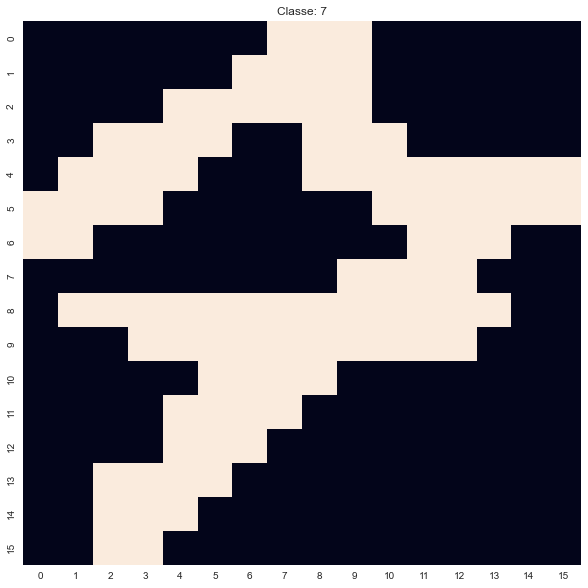

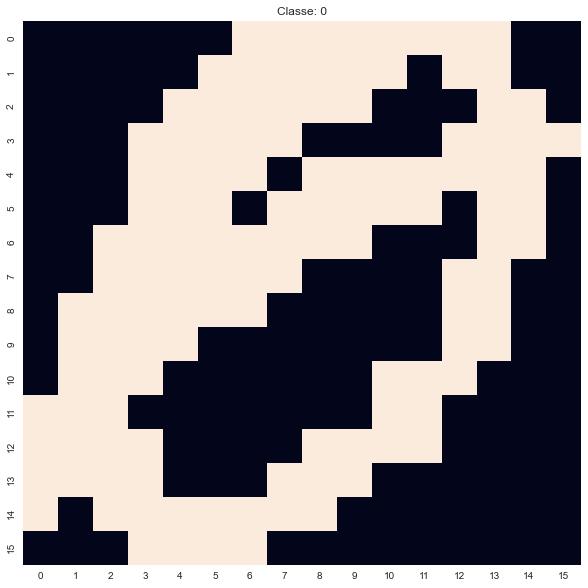

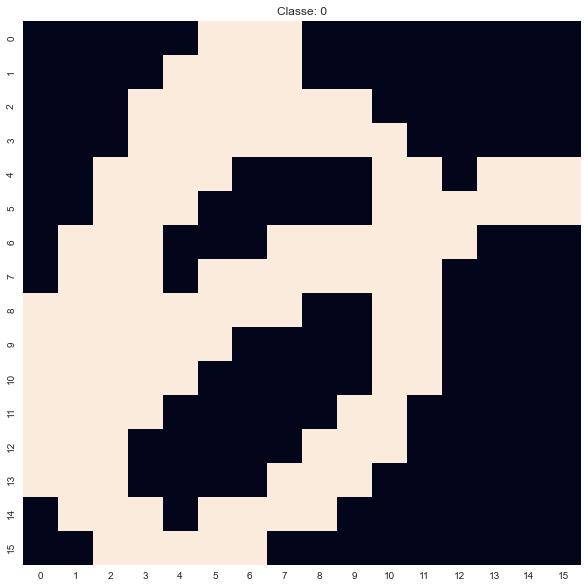

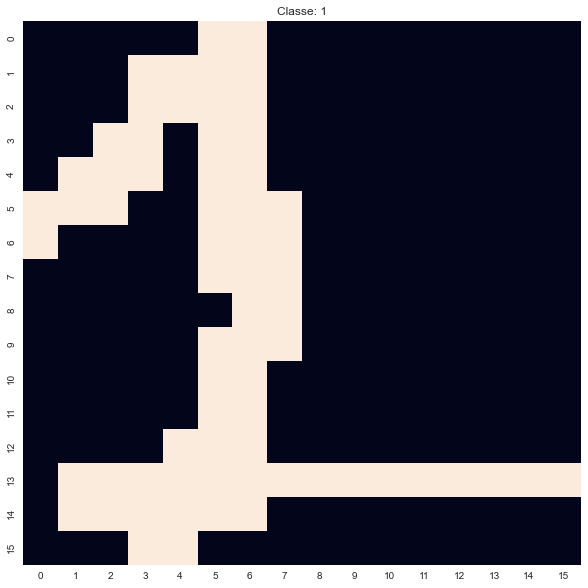

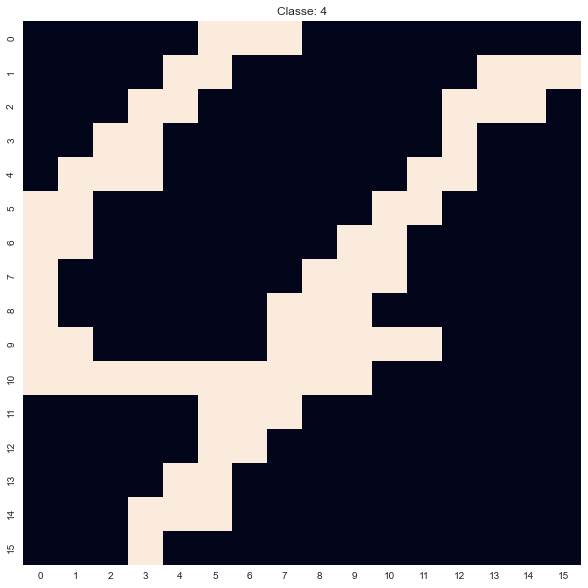

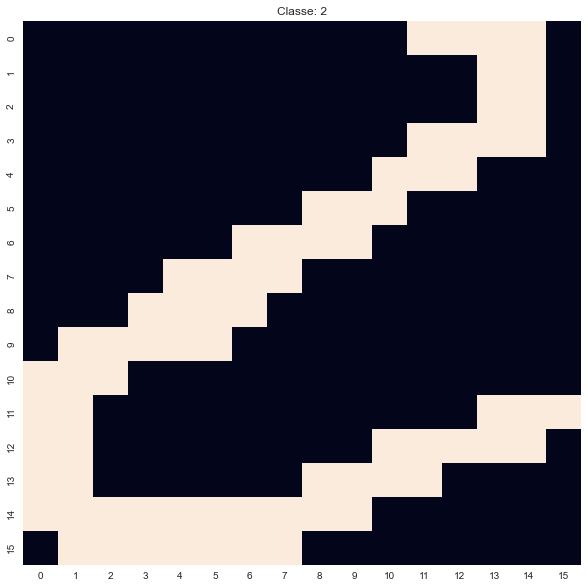

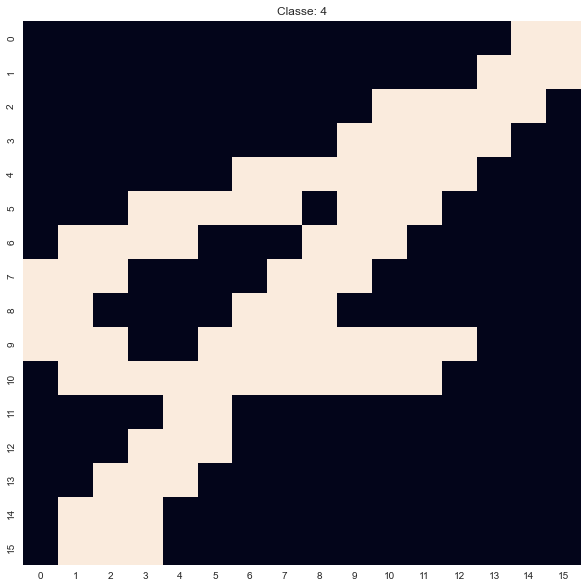

In [54]:
for ind in df_compare_models_tunados.loc[erros_MLP & erros_SVM & erros_RFC & erros_GBC].index:
    decode_bits_to_image(df_semeion.loc[ind:ind])

# Outras figuras

<b> Regressão Linear

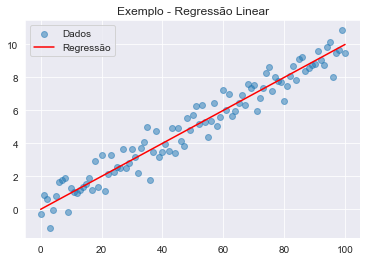

In [34]:
x = np.arange(0,101,1)
y_reta = x/10
y = [(i+np.random.randn()*7.6)/10 for i in x]
plt.title('Exemplo - Regressão Linear')

plt.scatter(x,y,alpha=0.5)
plt.plot(x,y_reta,c='red')
plt.legend(['Dados','Regressão']);

<b> Regressão Logística

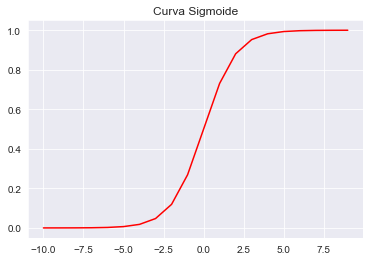

In [35]:
x = np.arange(-10,10,1)
y_reta = 1/(1+np.exp(-x))
plt.title('Curva Sigmoide')
plt.plot(x,y_reta,c='red');

<b> Regressão Logística

Text(0.5, 1.0, 'Exemplo: KNN')

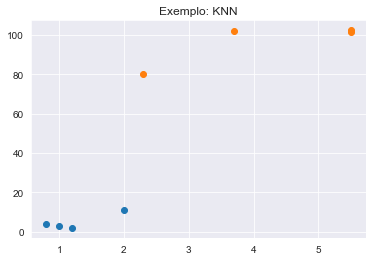

In [36]:
group1 = [3,2,11,4]
group2 = [102.3,102,101.5,80]
x1     = np.array([1,1.2,2,0.8])
x2     = [i+np.random.randint(50)/10 for i in x1]

plt.scatter(x1,group1)
plt.scatter(x2,group2)
plt.title("Exemplo: KNN")